<a href="https://colab.research.google.com/github/albaMCh/Visualizacion_Datos/blob/main/Alcance_Insta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

Instagram es una de las aplicaciones de redes sociales más populares hoy en día. Las personas que utilizan Instagram profesionalmente lo hacen para promocionar su negocio, crear un portafolio, bloguear y crear varios tipos de contenido. Como Instagram es una aplicación popular utilizada por millones de personas con diferentes nichos, Instagram sigue cambiando para mejorar para los creadores de contenido y los usuarios. Pero como esto sigue cambiando, afecta al alcance de nuestras publicaciones que nos afecta a largo plazo. Así que si un creador de contenido quiere hacerlo bien en Instagram a largo plazo, tiene que mirar los datos de su alcance en Instagram. Ahí es donde entra el uso de la Ciencia de Datos en las redes sociales. 

Si quieres analizar el alcance de tu cuenta de Instagram, tienes que recopilar tus datos manualmente ya que hay algunas APIs, pero no funcionan bien. Así que es mejor recopilar tus datos de Instagram manualmente.

Puedes descargar el conjunto de datos que utilizaremos para el proyecto de análisis de alcance de Instagram desde aquí:

https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv


Los datos pertenecen a la cuenta the.clever.programmer, que cuenta con 17.9k seguidores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

Lo primero que debes hacer es buscar cuantos valores nulos hay en cada columna.

In [ ]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

Vamos a comprobar cuantas filas contiene el dataset para ver si podríamos eliminar los valores nulos directamente o perderíamos mucha información.

In [ ]:
len(data)

100

Dado que tiene 100 filas podemos permitirnos el lujo de eliminar los datos nulos.

In [ ]:
data.dropna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4082.0,2195.0,1248.0,541.0,36.0,135.0,11.0,5.0,175.0,19.0,6.0,Deep learning is a subset of machine learning ...,#deeplearning #machinelearning #artificialinte...
95,5394.0,2275.0,2975.0,45.0,65.0,61.0,19.0,6.0,147.0,69.0,6.0,You must have heard or invested in any cryptoc...,#data #datascience #dataanalysis #dataanalytic...
96,2766.0,2541.0,116.0,51.0,9.0,40.0,10.0,4.0,114.0,11.0,6.0,Here are all the programming languages that Fa...,#programming #coding #programmer #python #deve...
97,3924.0,2244.0,1278.0,326.0,34.0,139.0,11.0,3.0,151.0,19.0,2.0,Here are some of the most popular data science...,#data #datascience #dataanalysis #dataanalytic...


Por último comprueba que tipo de datos contiene cada columna.

In [ ]:
data.dtypes

Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

#Pregunta 1

Una vez realizado el análisis preliminar de los datos vamos a realizar diferentes gráficas para responder preguntas como:

¿Las impresiones desde la pestaña Inicio (Home/TimeLine) siguen alguna distribución?

Realiza un histograma y/o un gráfico de densidad (recuerda que debes importar seaborn) de los datos de la columna 'From Home' y almacena en la variable solución_1 la letra correspondiente a la distribución que más se asemeja:

a) Exponencial

b) Normal

c) Geométrica

d) Uniforme



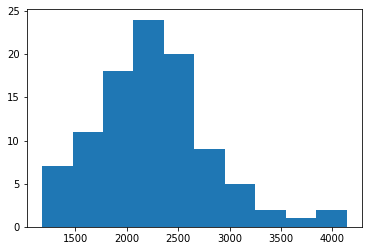

In [ ]:
plt.hist(data['From Home'])
plt.show()

In [ ]:
solucion_1='b'

#Pregunta 2

Vamos a realizar el mismo análisis pero con las impresiones recibidas a traves de los hashtags, que son herramientas que utilizamos para categorizar nuestras publicaciones en Instagram y así poder llegar a más personas en función del tipo de contenido que estamos creando.

Realiza un histograma y/o un gráfico de densidad (recuerda que debes importar seaborn) de la columna 'From Hashtags' y almacena en la variable solución_2 la letra correspondiente a la distribución que más se asemeja:

a) Exponencial

b) Normal

c) Geométrica

d) Uniforme

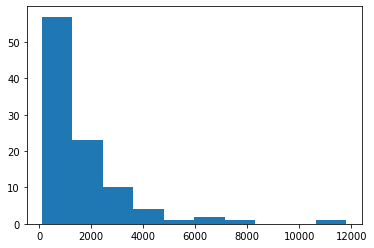

In [ ]:
plt.hist(data['From Hashtags'])
plt.show()

In [ ]:
solucion_2='c'

#Pregunta 3

Analiza también mediante un histograma y/o un gráfico de densidad la distribucción de las impresiones que vienen de la sección explorar, es decir, del sistema de recomendación de Instagram.



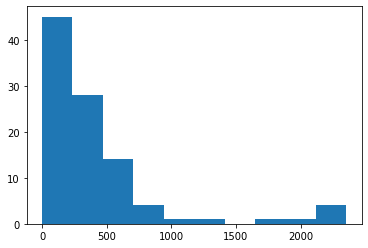

In [ ]:
plt.hist(data['From Explore'])
plt.show()

¿A qué distribución se parece más a la de las impresiones recibidas desde el inicio o las recibidas por hashtag? Responde en la variable solucion_3 con 'home' o 'hashtags' según consideres que es más parecida.

In [ ]:
solucion_3='hashtags'

#Pregunta 4

Una vez analizado cada fuente de impresiones por separado realiza un gráfico de tarta para comprobar las cantidades totales que vienen de cada fuente. Incluye el porcentaje dentro del gráfico con formato '%.2f%%' y los nombres de las columnas como etiquetas.

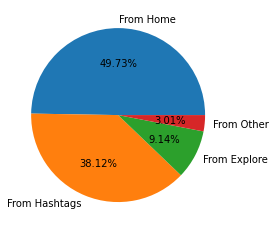

In [ ]:

From = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']]

From_result = From.sum(axis=0)

datos = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

plt.pie(From_result, labels=datos, autopct='%.2f%%')

plt.show()

Almacena True (booleano) en la variable solucion_4 si la suma de impresiones totales recibidas a través de Hashtags y la sección explorar es mayor que las impresiones totales recibidas desde la sección de inicio, sino almacena False.

In [ ]:
solucion_4=False

#Pregunta 5

Vamos a analizar algunas relaciones entre variables, por ejemplo:

¿Están relacionadas las columnas 'Impresiones' y 'Likes'? Crea un gráfico de dispersión cuyo eje x sean las impresiones, el eje y los likes y los puntos tengan distinto tamaño en función de los likes.

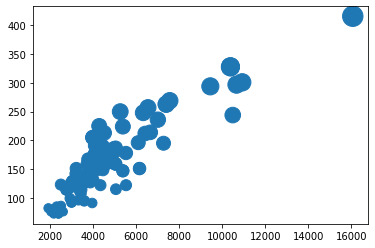

In [ ]:
x = data['Impressions']
y = data['Likes']


  
size = [1 * n for n in y]
plt.scatter(x, y, s=size)

plt.show()  

Realiza el mismo tipo de gráfico para comprobar si existe relación entre las impresiones y el número de comentarios.

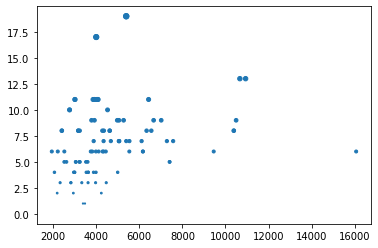

In [ ]:
x = data['Impressions']
y = data['Comments']

size = [1.5 * n for n in y]
plt.scatter(x, y, s=size)

plt.show()

Almacena en la variable solución_5 la letra de la frase correcta:

a) Tanto los likes como los comentarios están relacionados con las impresiones.

b) Los likes están relacionados con las impresiones pero los comentarios no.

c) Los comentarios están relacionados con las impresiones pero los likes no.

d) Ni los likes ni los comentarios están relacionados con las impresiones.

In [ ]:
solucion_5='b'

#Pregunta 6

En Matemáticas para Data Science vimos como calcular la correlación entre las columnas de una matriz usando:

    np.corrcoef('nombre_matriz'))

Podemos comprobar la correlación de un dataframe entero de forma similar utilizando:

    nombre_dataframe.corr()


Utiliza el valor de correlación entre columnas para generar un mapa de calor con estilo de color 'hot' y plt.colorbar() para mostrar la leyenda del gráfico y plt.yticks para añadir etiquetas al eje y.

<function matplotlib.pyplot.show(*args, **kw)>

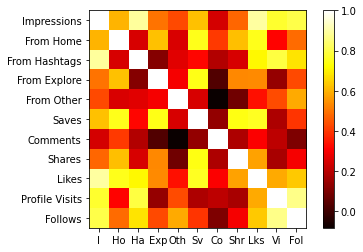

In [ ]:
data.corr()

plt.imshow(data.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.yticks([0,1,2,3,4,5,6,7,8,9,10], labels=['Impressions','From Home','From Hashtags','From Explore','From Other','Saves','Comments','Shares','Likes','Profile Visits','Follows'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], labels=['I','Ho','Ha','Exp','Oth','Sv','Co','Shr','Lks','Vi','Fol'])
plt.show

¿A que relación corresponden los cuadrados de color negro? Almacena la letra de la respuesta correcta en la variable pregunta 6

a) Impressions-From Hashtags

b) Follows-Profile Visits

c) Shares-Likes

d) Comments-From Others

In [ ]:
solucion_6='d'

¿Cuál es la acción que más relacionada está con los follows? Escribe el nombre de la columna que corresponda en la variable solucion_7.

In [ ]:
solucion_7='Profile Visits'

In [ ]:
#@title Ejecuta para obtener el token
import hashlib

correct = str(solucion_1)+ str(solucion_2)+ str(solucion_3)+ str(solucion_4)+ str(solucion_5)+ str(solucion_6)+ str(solucion_7)
pwd = hashlib.sha256(str(correct).encode())
#print('El token para corregir en Nodd3r es:\n',pwd.hexdigest())
if pwd.hexdigest()[0:6] == '4ad819':
  print('¡Felicidades! puedes avanzar al siguiente modulo \n El token es: ',pwd.hexdigest())
else:
  print('Hay algún error en el código o tu forma es diferente a la planteada, pregunta por el foro si no lo ves claro.')

¡Felicidades! puedes avanzar al siguiente modulo 
 El token es:  4ad819b999221644c9e42f06eec0db6789532df5b97de2a7daa0d1caea7de812


#Bonus: Introducción a Machine Learning

Como adelanto de lo que aprenderéis en el próximo curso vamos a predecir el alcance que tendría un post en instagram en funcion del número de Likes, veces que ha sido guardado, cantidad de comentarios, veces compartido,visitas al perfil y seguidores.

In [ ]:
#Importamos de sklearn lo que necesitaremos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
#Seleccionamos los datos que utilizaremos para predecir (x) y los datos que queremos medir (y)
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
#los dividimos en dos partes, la primera para entrenar el algoritmo y la segunda para testearlo.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [ ]:
#Utilizamos un modelo de regresión para entrenar el algoritmo y comprobar los resultados con los datos de test
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

ValueError: ignored

In [ ]:
#Realizamos la predicción en funcion de los parámetros seleccionados (features=[['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

AttributeError: ignored